# Qiskit 101

In [111]:
%pip install qiskit[visualization]

Note: you may need to restart the kernel to use updated packages.


# Build a Circuit with Qiskit

In [112]:
from qiskit import QuantumCircuit, QuantumRegister

In [113]:
qubits = QuantumRegister(2, name = "q")

In [114]:
circuit = QuantumCircuit(qubits)

In [115]:
q0, q1 = qubits

In [116]:
# Create the First Bell State
# Replace the '?'
#############################
circuit.h(q0)
circuit.cx(q0, q1)

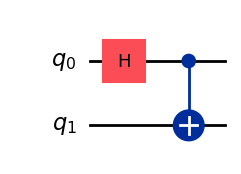

In [117]:
circuit.draw('mpl')

# Transpile a Circuit with Qiskit Presets

In [118]:
%pip install qiskit-ibm-runtime

Note: you may need to restart the kernel to use updated packages.


In [119]:
from qiskit import QuantumCircuit, QuantumRegister

In [120]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [121]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [122]:
qubits = QuantumRegister(2, name="q")

In [123]:
circuit = QuantumCircuit(qubits)

In [124]:
q0, q1 = qubits

In [125]:
# Create again the First Bell State
# Replace the ?
###################################
circuit.h(q0)
circuit.cx(q0, q1)

In [126]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='ca510ffa26e7cab3a62660e5dfc40269bcec1b1e369333737ff46892bc37b489d6538948eac6fd55a43f7370435debcd36da4cb6a88348ed62279f1fffbd635a'
)

In [127]:
# Select a Backend
# Replace the ?
###################
backend = service.least_busy(simulator=False)

In [128]:
# Replace the ?
pass_manager = generate_preset_pass_manager(1, backend=backend)
### Light Optimization (levels are between 0 and 3)

In [129]:
# Replace the ?
transpiled = pass_manager.run(circuit)

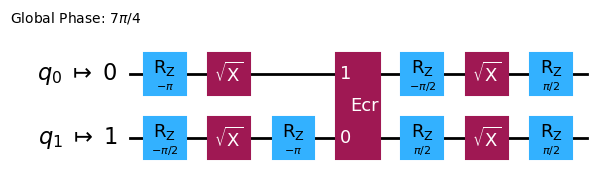

In [130]:
transpiled.draw("mpl", idle_wires=False)

# The Esitmator Primitive

In [131]:
%pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.


In [132]:
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator

In [133]:
from qiskit import QuantumCircuit, QuantumRegister

In [134]:
from qiskit.quantum_info import SparsePauliOp

In [135]:
from qiskit_aer.primitives import Estimator

In [136]:
qubits = QuantumRegister(2, name="q")

In [137]:
circuit = QuantumCircuit(qubits)

In [138]:
q0, q1 = qubits

In [139]:
# Create the First Bell State
# Replace the ?
circuit.h(q0)
circuit.cx(q0, q1)

In [140]:
observable = SparsePauliOp("ZZ")

In [141]:
estimator = Estimator()

In [142]:
# Replace the ?
job = estimator.run([circuit], [observable])
exact_value = job.result().values[0]
print(f"Exact Expectation Value: {exact_value}")

Exact Expectation Value: 1.0


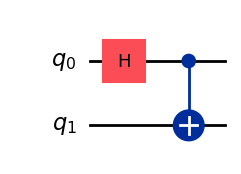

In [143]:
circuit.draw("mpl")

# Build a Noise Model

### From Real Backend

In [144]:
from qiskit_aer.noise import NoiseModel

In [145]:
from qiskit_aer.primitives import Estimator

In [146]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [147]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='ca510ffa26e7cab3a62660e5dfc40269bcec1b1e369333737ff46892bc37b489d6538948eac6fd55a43f7370435debcd36da4cb6a88348ed62279f1fffbd635a'
)

In [148]:
backend = service.backend("ibm_sherbrooke")

In [149]:
# Replace the ?
noise_model = NoiseModel.from_backend(backend)

In [150]:
# Replace the ?
estimator = Estimator(backend_options=dict(noise_model=noise_model))

In [151]:
print(estimator,noise_model)

<qiskit_aer.primitives.estimator.Estimator object at 0x7cef704e8890> NoiseModel:
  Basis gates: ['delay', 'ecr', 'for_loop', 'id', 'if_else', 'measure', 'reset', 'rz', 'switch_case', 'sx', 'x']
  Instructions with noise: ['x', 'ecr', 'sx', 'id', 'measure', 'reset']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
  Specific qubit errors: [('x', (0,)), ('x', (1,)), ('x', (2,)), ('x', (3,)), ('x', (4,)), ('x', (5,)), ('x', (6,)), ('x', (7,)), ('x', (8,)), ('x', (9,)), ('x', (10,)), ('x', (11,)), ('x

### From scratch

In [152]:
from qiskit_aer.noise import ReadoutError, depolarizing_error

In [153]:
noise_model = NoiseModel()

In [154]:
cx_depolarizing_prob = 0.02

In [155]:
bit_flip_prob = 0.05

In [156]:
# Replace the ?
noise_model.add_all_qubit_quantum_error(
    depolarizing_error(cx_depolarizing_prob, 2), ["cx"]
)

In [157]:
# Replace the ?
noise_model.add_all_qubit_readout_error(
    ReadoutError(
        [
            [1 - bit_flip_prob, bit_flip_prob],
            [bit_flip_prob, 1 - bit_flip_prob],
        ]
    )
)

In [158]:
##### A readable interpretation of the previous cell:
##### Measurement misassignment probabilities
p0given1 = 0.1
p1given0 = 0.05
ReadoutError([[1 - p1given0, p1given0], [p0given1, 1 - p0given1]])

ReadoutError([[0.95 0.05]
 [0.1  0.9 ]])

# Run a Circuit

In [160]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp, random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2, Session

n_qubits = 7

# Initialize Qiskit Runtime Service
service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='ca510ffa26e7cab3a62660e5dfc40269bcec1b1e369333737ff46892bc37b489d6538948eac6fd55a43f7370435debcd36da4cb6a88348ed62279f1fffbd635a'
)

# Select the least busy backend that meets the requirements
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=n_qubits)

# Generate a random Hermitian matrix and construct the IQP circuit
mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)

# Create the observable
observable = SparsePauliOp("Z" * n_qubits)

# Transpile the circuit for the specific backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
isa_observable = observable.apply_layout(isa_circuit.layout)

# Use a session with the selected backend
with Session(backend=backend) as session:
    estimator = EstimatorV2()
    job = estimator.run([(isa_circuit, isa_observable)])
    result = job.result()

# Print the result
print(f" > Expectation value: {result.values[0]}")
print(f" > Metadata: {result.metadata}")

job = estimator.run([(isa_circuit, isa_observable)])
result = job.result()
 
print(f" > Expectation value: {result.data.evs}")
print(f" > Metadata: {result.metadata}")


AttributeError: 'PrimitiveResult' object has no attribute 'values'

# End of Notebook
### Author
Gaius Ocatvianus Augustus